In [ ]:
pip install unidecode

In [ ]:
# Data Structures
import numpy  as np
import pandas as pd
import json

# Corpus Processing
import string
import re
import csv
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from nltk.corpus                      import wordnet as wn
from nltk.stem                        import WordNetLemmatizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from collections                      import Counter

# K-Means
from sklearn import cluster
from sklearn.cluster import KMeans

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.datasets                 import make_blobs
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud
# from jupyterthemes                    import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

Mount to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


read it from the drive

In [ ]:
Data = pd.read_csv('/content/drive/My Drive/tweets/tweets.csv') 
Data.head()

,id,user,text
0,2.000000e+01,12,just setting up my twttr
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo..."
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...


Take the histogram to identify the frequency of the lengths 

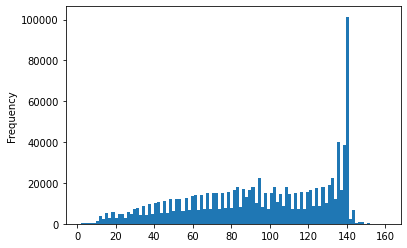

In [ ]:
Data['length'] = Data['text'].apply(len)
Data['length'].plot(bins=100, kind='hist')

Take the tweets and user IDs

In [ ]:
data=Data.copy()
data = data.loc[:,['text',"user"]]
# data=data.to_frame()
data.drop_duplicates(subset='text', keep=False, inplace=True)
data.head(6)
tweets_df=0

In [ ]:
data.duplicated(['text']).sum()

0

Take the tweets into a list of text


In [ ]:
corpus = data['text'].tolist()

Remove numbers and web links, emails and Make all letters lower case


In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(Data, 'text', 'text_clean')
data_clean.head()

,id,user,text,length,text_clean
0,2.000000e+01,12,just setting up my twttr,24,just setting up my twttr
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....,59,wow coachella on vine is amazing
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo...",112,shes back climbing if you love it maybe you h...
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD,47,sweet victory warriors
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...,135,just ridiculous the knicks are the hardest te...


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Tokenized the words and put it in a set

In [ ]:
data_clean['tokenized_sents'] = data_clean.apply(lambda row: set(nltk.word_tokenize(row['text_clean'])), axis=1)
data_clean.head()

,id,user,text,length,text_clean,tokenized_sents
0,2.000000e+01,12,just setting up my twttr,24,just setting up my twttr,"{twttr, setting, up, my, just}"
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....,59,wow coachella on vine is amazing,"{coachella, amazing, vine, on, wow, is}"
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo...",112,shes back climbing if you love it maybe you h...,"{if, back, shes, when, climbing, love, even, t..."
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD,47,sweet victory warriors,"{sweet, victory, warriors}"
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...,135,just ridiculous the knicks are the hardest te...,"{assholes, ridiculous, eff, like, i, are, the,..."


Remove all stop words

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
for i in range(len(stopwords)):
  stopwords[i] = stopwords[i].lower()
  stopwords[i] = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", stopwords[i]) 
  stopwords[i] =re.sub(r"\d+", "", stopwords[i])
stopwords=set(stopwords)
data_clean['tokenized_sents'] = data_clean.apply(lambda row: row['tokenized_sents']-stopwords, axis=1)

Remove all the other words which you has in a text document

In [ ]:
other_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/tweets/stopwords_scrapmaker.txt')]
for i in range(len(other_words)):
  other_words[i] = other_words[i].lower()
  other_words[i] = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", other_words[i]) 
  other_words[i] =re.sub(r"\d+", "", other_words[i])
other_words=set(other_words)
data_clean['tokenized_sents'] = data_clean.apply(lambda row: row['tokenized_sents']-other_words, axis=1)

In [ ]:
data_clean.head()

,id,user,text,length,text_clean,tokenized_sents
0,2.000000e+01,12,just setting up my twttr,24,just setting up my twttr,"{twttr, setting}"
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....,59,wow coachella on vine is amazing,"{amazing, wow, coachella, vine}"
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo...",112,shes back climbing if you love it maybe you h...,"{back, climbing, love, maybe, breaks, even, go}"
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD,47,sweet victory warriors,"{sweet, victory, warriors}"
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...,135,just ridiculous the knicks are the hardest te...,"{assholes, ridiculous, eff, like, knicks, know..."


WordNetLemmatizer has done in this section

In [ ]:
wnl = WordNetLemmatizer()
def pos_tag_text(tokens):
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
        
    tagged_text = nltk.pos_tag(tokens)

    tagged_text_set = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_text_set
# lemmatize text based on POS tags    
def lemmatize_text(tokens):
    
    pos_tagged_text = pos_tag_text(tokens)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    # print(lemmatized_tokens)
    return lemmatized_tokens
data_clean['tokenized_sents_1'] = data_clean.apply(lambda row: lemmatize_text(list(row['tokenized_sents'])), axis=1)
data_clean.head()

Streaming output truncated to the last 5000 lines.
['minute', 'twitter', 'todays', 'much', 'stats', 'see', 'spent']
['give', 'start', 'thing', 'spirit', 'brick', 'crave', 'crave', 'feed']
['lauren', 'love', 'follow', 'u', 'please', 'much']
['inner', 'croptee', 'aeee', 'love', 'ya', 'siapa', 'maupm', 'pin']
['tndmo', 'mush', 'sww', 'follow', 'lh', 'tweet', 'amazing', 'ff']
['give', 'us', 'defender', 'club', 'clough', 'nigel', 'leave', 'good', 'send', 'robert', 'chat', 'gareth', 'confirm']
['p', 'love', 'bro', 'awhh']
['chlo', 'good', 'love', 'know', 'floss']
['gon', 'complete', 'work', 'na', 'fuck', 'read', 'kill', 'instead', 'give', 'story', 'class', 'neha']
['holiday', 'weekend', 'bank', 'alcoholic', 'jaaaarf', 'nothing', 'beat', 'friend', 'horizon']
['wish', 'sad', 'yall', 'know', 'fuck', 'excite', 'know', 'shit', 'seem', 'happy', 'hell', 'army', 'love', 'want']
['birthday', 'anymore', 'want', 'even', 'go']
['problem', 'ugh', 'seriously', 'sleep', 'everday', 'suck', 'sincerely', 'sch

2 letter and single letter words are moved from the list 

In [ ]:
alp="qwertyuioplkjhgfdsazxcvbnm"
word2=[i for i in alp]
for i in alp:
  for j in alp:
    word2+=[i+j]
word2=set(word2)data_clean['tokenized_sents_2'] = data_clean.apply(lambda row: list(set(row['tokenized_sents_1'])-word2), axis=1)

data_clean.head()

,id,user,text,length,text_clean,tokenized_sents
0,2.000000e+01,12,just setting up my twttr,24,just setting up my twttr,"{twttr, set}"
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....,59,wow coachella on vine is amazing,"{wow, coachella, vine, amaze}"
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo...",112,shes back climbing if you love it maybe you h...,"{back, climb, love, maybe, break, even}"
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD,47,sweet victory warriors,"{sweet, victory, warrior}"
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...,135,just ridiculous the knicks are the hardest te...,"{ridiculous, eff, like, knicks, know, nycers, ..."


In [ ]:
data_clean.head(5)

,id,user,text,length,text_clean,tokenized_sents,tokenized_sents_1
0,2.000000e+01,12,just setting up my twttr,24,just setting up my twttr,"{twttr, setting}","[twttr, set]"
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....,59,wow coachella on vine is amazing,"{amazing, wow, coachella, vine}","[amaze, wow, coachella, vine]"
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo...",112,shes back climbing if you love it maybe you h...,"{back, climbing, love, maybe, breaks, even, go}","[back, climb, love, maybe, break, even, go]"
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD,47,sweet victory warriors,"{sweet, victory, warriors}","[sweet, victory, warrior]"
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...,135,just ridiculous the knicks are the hardest te...,"{assholes, ridiculous, eff, like, knicks, know...","[asshole, ridiculous, eff, like, knicks, know,..."


Join the sets and made a normal text (sentence)

In [ ]:
data_clean["tokenized_sents_2"]=data_clean.apply(lambda row: " ".join(row['tokenized_sents_1']), axis=1)
data_clean.head(5)

,id,user,text,length,text_clean,tokenized_sents,tokenized_sents_1,tokenized_sents_2
0,2.000000e+01,12,just setting up my twttr,24,just setting up my twttr,"{twttr, setting}","[twttr, set]",twttr set
1,3.230000e+17,12,Wow. #coachella on Vine is amazing. http://t....,59,wow coachella on vine is amazing,"{amazing, wow, coachella, vine}","[amaze, wow, coachella, vine]",amaze wow coachella vine
2,3.300000e+17,16,"She's back climbing - if you love it, maybe yo...",112,shes back climbing if you love it maybe you h...,"{back, climbing, love, maybe, breaks, even, go}","[back, climb, love, maybe, break, even, go]",back climb love maybe break even go
3,3.300000e+17,17,Sweet victory. #warriors http://t.co/d8LnaVwphD,47,sweet victory warriors,"{sweet, victory, warriors}","[sweet, victory, warrior]",sweet victory warrior
4,3.300000e+17,291,@superfoot just ridiculous. The Knicks are the...,135,just ridiculous the knicks are the hardest te...,"{assholes, ridiculous, eff, like, knicks, know...","[asshole, ridiculous, eff, like, knicks, know,...",asshole ridiculous eff like knicks know nycers...


In [ ]:
data=data_clean.loc[:,["user","id","tokenized_sents_2"]]
data.to_csv("/content/drive/My Drive/tweets/data_clean.csv")
data.head(5)


,user,id,tokenized_sents_2
0,12,2.000000e+01,twttr set
1,12,3.230000e+17,amaze wow coachella vine
2,16,3.300000e+17,back climb love maybe break even go
3,17,3.300000e+17,sweet victory warrior
4,291,3.300000e+17,asshole ridiculous eff like knicks know nycers...
